Given a table of numerical values of a function that is represented as follows:

$$
\begin{array}{ c|c|c|c|c }
    x & x_0 & x_1 & \cdots & x_n \\ \hline
    y & y_0 & y_1 & \cdots & y_n
\end{array}
$$

Is it possible to find a formula that reproduces the given points exactly? This problem comes under the category of function interpolation/approximation.

##### 1. Polynomial Interpolation

Let us assume a distinct set of points $\Bbb{D} := \{(x_i, y_i) \forall i = 0, 1, 2, \cdots, n\}$. We seek to determine a polynomial $p$ that passes through all the points. Therefore, the polynomial $p$ for which $p(x_i) = y_i \forall i = 0, 1, 2, \cdots, n$ is said to **interpolate** the table.

The polynomial degree depends on the number of points $n$. If $n=0$, a **constant** function (polynomial of degree 0) $p(x)=y_0$ reproduces the one-point table. If $n=1$, a **linear** function (polynomial of degree 1) $p(x)=y_0 + (\frac{y_1-y_0}{x_1-x_0})(x-x_0)$ which satisfies $p(x_0)=y_0$ and $p(x_1)=y_1$.

To generalize, given a set of $n+1$ fixed points, we can define a polynomial of order $n$ which will interpolate the table of points. The interpolating polynomial $p$ can be expressed as:

$$
\begin{equation}
    p(x) = \sum_{i=0}^{n} c_i x^i
\end{equation}
$$

where the coefficients $c_i$'s are unknown. In order to satisy the condition $p(x_i) = y_i \forall i = 0, 1, 2, \cdots, n$, we substitute each point into the polynomial to get:

$$
\begin{align}
    p(x_0) & = c_0 + c_1 x_0 + c_2 x_0^2 + \cdots + c_n x_0^n = y_0 \\
    p(x_1) & = c_0 + c_1 x_1 + c_2 x_1^2 + \cdots + c_n x_1^n = y_1 \\
    \vdots \\
    p(x_n) & = c_0 + c_1 x_n + c_2 x_n^2 + \cdots + c_n x_n^n = y_n 
\end{align}
$$

Rewriting this in matrix form gives:

$$
\begin{bmatrix}
    1 & x_0 & x_0^2 & \cdots & x_0^n \\
    1 & x_1 & x_1^2 & \cdots & x_1^n \\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    1 & x_n & x_n^2 & \cdots & x_n^n
\end{bmatrix}
\begin{bmatrix}
    c_0 \\
    c_1 \\
    \vdots \\
    c_n
\end{bmatrix} = 
\begin{bmatrix}
    y_0 \\
    y_1 \\
    \vdots \\
    y_n
\end{bmatrix}
$$

This gives a system of linear equations of the form $\bf{Ac=y}$ which is needed to be solved. The matrix $\bf{A}$ is called the **Vandermonde** matrix. We are not going to explicitly discuss the methods for solving systems of linear equation. However, in our coding sessions we will use some library functions that will perform this task for us.

Import necessary library packages in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define a function **interpolatePolynomial** that uses a polynomial form as mentioned above to find the value of the function

In [2]:
def interpolatePolynomial(x_point, c_array):

    p_x = 0.0
    for i in range(c_array.size):
        p_x = p_x + c_array[i]*(x_point**i)

    return p_x

Define two arrays x and y which will store the table of points which will be interpolated

In [3]:
x = np.array([0.0, 1.0, -1.0, 2.0, -2.0])
y = np.array([-5.0, -3.0, -15.0, 39.0, -9.0])

Define a function **formVandermondePolynomial** that inputs array **x** and returns the **Vandermonde** matrix

In [4]:
def formVandermondePolynomial(x_array):

    n = x_array.size
    A = np.zeros((n, n))

    for i in range(n):
        for j in range(n):

            A[i][j] = x_array[i]**j

    return A

Solve the system of equations $\bf{Ac=y}$ using linear algorithm solver in the Numpy library

In [5]:
A = formVandermondePolynomial(x)
c = np.linalg.solve(A, y)

Now using $c$, we can interpolate the table for any value of $x$. First, let's check if the polynomial satisfies the points in the table.

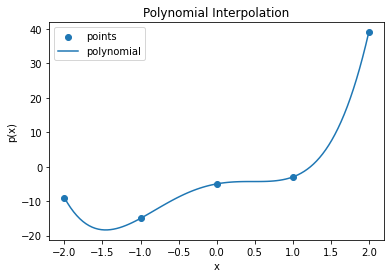

In [6]:
x_pred = np.linspace(-2.0, 2.0, num=100)
y_pred = interpolatePolynomial(x_pred, c)
plt.scatter(x, y)
plt.plot(x_pred, y_pred)
plt.legend(["points", "polynomial"])
plt.title("Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

##### 2. Generalized Interpolation

This method can be generalized to be used with any function instead of polynomials. The interpolating function $f$ can be expressed as:

$$
\begin{equation}
    f(x) = \sum_{i=0}^{n} c_i \psi_i(x)
\end{equation}
$$

where the functions $\psi_0(x), \psi_1(x), \cdots, \psi_n(x)$ are known as *basis* functions and the coefficients $c_i$ are to be determined. The same concept of using the **Vandermonde** matrix can be used to form the linear system of equations in order to calculate the coefficients. Let us look at an example:

Let us use trigonometric functions as *basis* functions. We will use the following form as the interpolating function:

$$
\begin{equation}
    f(x) = c_0 + \sum_{i=1}^{n} c_i cos(i \pi x) + d_i sin(i \pi x)
\end{equation}
$$

Define a function **interpolateTrigonometric** that uses a trigonometric functions as mentioned above to find the value of the function

In [7]:
def interpolateTrigonometric(x_point, c_0, c_array, d_array):

    p_x = c_0
    for i in range(c_array.size):
        p_x = p_x + c_array[i]*np.cos((i+1) * np.pi * x_point)

    for i in range(d_array.size):
        p_x = p_x + d_array[i]*np.sin((i+1) * np.pi * x_point)

    return p_x

In order to satisy the condition $f(x_i) = y_i \forall i = 0, 1, 2, \cdots, 2n+1$, we substitute each point into the polynomial to get:

$$
\begin{align}
    f(x_0) & = c_0 + c_1 cos(\pi x_0) + d_1 sin(\pi x_0) + \cdots + c_n cos(n \pi x_0) + d_n sin(n \pi x_0) = y_0 \\
    f(x_1) & = c_0 + c_1 cos(\pi x_1) + d_1 sin(\pi x_1) + + \cdots + c_n cos(n \pi x_1) + d_n sin(n \pi x_1) = y_1 \\
    \vdots \\
    f(x_{2n+1}) & = c_0 + c_1 cos(\pi x_{2n+1}) + d_1 sin(\pi x_{2n+1}) + \cdots + c_n cos(n \pi x_{2n+1}) + d_n sin(n \pi x_{2n+1}) = y_{2n+1}
\end{align}
$$

Rewriting this in matrix form gives:

$$
\begin{bmatrix}
    1 & cos(\pi x_0) & sin(\pi x_0) & \cdots & cos(n \pi x_0) & sin(n \pi x_0) \\
    1 & cos(\pi x_1) & sin(\pi x_1) & \cdots & cos(n \pi x_1) & sin(n \pi x_1) \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    1 & cos(\pi x_{2n+1}) & sin(\pi x_{2n+1}) & \cdots & cos(n \pi x_{2n+1}) & sin(n \pi x_{2n+1})
\end{bmatrix}
\begin{bmatrix}
    c_0 \\
    c_1 \\
    d_1 \\
    \vdots \\
    c_n \\
    d_n
\end{bmatrix} = 
\begin{bmatrix}
    y_0 \\
    y_1 \\
    \vdots \\
    y_{2n+1}
\end{bmatrix}
$$

Define a function **formVandermondeTrigonometric** that inputs array **x** and returns the **Vandermonde** matrix

In [8]:
def formVandermondeTrigonometric(x_array):

    n = x_array.size
    A = np.zeros((n, n))

    for i in range(n):

        A[i][0] = 1.0
        for j in range(n):

            if j == 0:
                continue
            
            if j % 2 == 0:
                A[i][j] = np.sin(int(j/2) * np.pi * x_array[i])
            else:
                A[i][j] = np.cos(int((j+1)/2) * np.pi * x_array[i])

    return A

Define another set of points

In [9]:
x = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])
y = np.array([0.0, 0.0, 1.0, 0.0, 0.0])

Compare polynomial and trigonometric interpolations

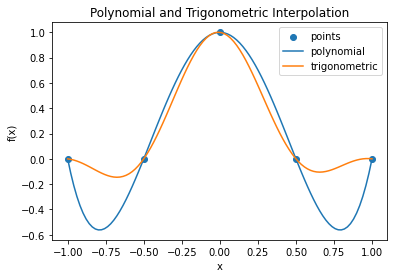

In [10]:
A_poly = formVandermondePolynomial(x)
c_poly = np.linalg.solve(A_poly, y)

A_trig = formVandermondeTrigonometric(x)
coeff = np.linalg.solve(A_trig, y)
c_0 = coeff[0]
c_trig = coeff[1::2]
d_trig = coeff[2::2]

x_pred = np.linspace(-1.0, 1.0, num=100)
y_pred_poly = interpolatePolynomial(x_pred, c_poly)
y_pred_trig = interpolateTrigonometric(x_pred, c_0, c_trig, d_trig)
plt.scatter(x, y)
plt.plot(x_pred, y_pred_poly)
plt.plot(x_pred, y_pred_trig)
plt.legend(["points", "polynomial", "trigonometric"])
plt.title("Polynomial and Trigonometric Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

##### 3. Natural Cubic Spline

The function $S(x)$ that we wish to construct consists of $n$ cubic polynomial pieces:

$$
S(x) = \left\{\begin{array}{lr}
        S_0(x), & x_0\leq x\leq x_1 \\
        S_1(x), & x_1\leq x\leq x_2 \\
        \vdots & \vdots \\
        S_{n-1}(x), & x_{n-1}\leq x\leq x_n \\
        \end{array}\right\}
$$

The interpolation conditions are $S(x_i) = y_i \forall i = 0, 1, 2, \cdots n$. The following continuity conditions imposed at the interior points $x_1, x_2, \cdots x_{n-1}$:

$$
\left\{\begin{array}{lr}
        \lim_{x\to x_i^-} S(x) = \lim_{x\to x_i^+} S(x) \\
        \lim_{x\to x_i^-} S'(x) = \lim_{x\to x_i^+} S'(x) \\
        \lim_{x\to x_i^-} S''(x) = \lim_{x\to x_i^+} S''(x)
        \end{array}\right\} \forall i = 1, 2, \cdots, n-1
$$

We require two more equations to make this problem solvable. These equations denote the second derivative at the end points $x_0$ and $x_n$:

$$
\begin{align}
    S''(x_0) & = S''(x_n) = 0
\end{align}
$$

Instead of using a regular Vandermonde type matrix to calculate the unknown cubic polynomial coefficients, a slightly different algorithm is used. This will not be discussed in class. The derivations would be a reading assignment. However, the code for interpolation would be given to students for understanding and testing.

In [11]:
def interpolateCubicSpline(x_point, x_array, y_array, z_array):

    m = x_array.size
    n = m - 1

    for i in range(n-1, -1, -1):
        if (x_point - x_array[i] >= 0.0):
            break

    h = x_array[i+1] - x_array[i]
    tmp = z_array[i]/2 + ((x_point - x_array[i])*(z_array[i+1] - z_array[i]))/(6*h)
    tmp = -(h/6)*(z_array[i+1] + 2*z_array[i]) + (y_array[i+1] - y_array[i])/h + (x_point - x_array[i])*tmp
    S = y_array[i] + (x_point - x_array[i])*tmp

    return S

def findCoefficientsCubicSpline(x_array, y_array):

    m = x_array.size
    n = int(m - 1)

    z_array = np.zeros(m)

    h = np.zeros(n)
    b = np.zeros(n)
    u = np.zeros(n)
    v = np.zeros(n)

    for i in range(n):
        h[i] = x_array[i+1] - x_array[i]
        b[i] = (y_array[i+1] - y_array[i])/h[i]

    u[1] = 2*(h[0] + h[1])
    v[1] = 6*(b[1] - b[0])

    for i in range(2, n):
        u[i] = 2*(h[i] + h[i-1]) - h[i-1]**2/u[i-1]
        v[i] = 6*(b[i] - b[i-1]) - h[i-1]*v[i-1]/u[i-1]

    z_array[n] = 0

    for i in range(n-1, 0, -1):
        z_array[i] = (v[i] - h[i]*z_array[i+1])/u[i]

    z_array[0] = 0

    return z_array

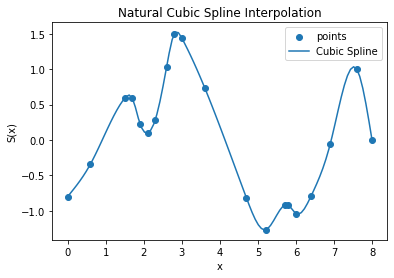

In [12]:
x_array = np.array([0.0, 0.6, 1.5, 1.7, 1.9, 2.1, 2.3, 2.6, 2.8, 3.0, 3.6, 4.7, 5.2, 5.7, 5.8, 6.0, 6.4, 6.9, 7.6, 8.0])
y_array = np.array([-0.8, -0.34, 0.59, 0.59, 0.23, 0.1, 0.28, 1.03, 1.5, 1.44, 0.74, -0.82, -1.27, -0.92, -0.92, -1.04, -0.79, -0.06, 1.0, 0.0])

z_array = findCoefficientsCubicSpline(x_array, y_array)

x_pred = np.linspace(0.0, 8.0, num=100)
y_pred = np.zeros(x_pred.size)
for j in range(x_pred.size):
    y_pred[j] = interpolateCubicSpline(x_pred[j], x_array, y_array, z_array)

plt.scatter(x_array, y_array)
plt.plot(x_pred, y_pred)
plt.legend(["points", "Cubic Spline"])
plt.title("Natural Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.show()